In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def convert_seconds_to_hms(times):
    hms_list = []
    for t in times:
        total_seconds = int(t)  # ignore milliseconds
        hours = total_seconds // 3600
        minutes = (total_seconds % 3600) // 60
        seconds = total_seconds % 60
        hms_list.append(f"{hours:02}:{minutes:02}:{seconds:02}")
    return hms_list

def map_laps_to_seconds_timeline(lap_times):
    timeline = []
    current_time = 0

    for i,lap in enumerate(lap_times):
        if i==0:
            current_time = lap
            timeline.append(round(current_time,2))
        else:
            current_time += lap
            timeline.append(round(current_time,2))
            
    return timeline

def get_nasa_tlx_files(directory):
    files = []
    for f in os.listdir(directory):
        f_strip = f.strip()
        if f_strip.endswith('.csv') and f_strip.startswith('Aware-ables'):
            files.append(f_strip)
    files = sorted(files)
    return [os.path.join(directory.strip(), f) for f in files]

def get_ecg_files(directory):
    files = []
    for f in os.listdir(directory):
        f_strip = f.strip()
        if f_strip.endswith('.CSV') and f_strip.startswith('Test_User'):
            files.append(f_strip)
    files = sorted(files)[:4]
    return [os.path.join(directory.strip(), f) for f in files]

def get_emg_files(directory):
    files = []
    for f in os.listdir(directory):
        f_strip = f.strip()
        if f_strip.endswith('.csv') and f_strip.startswith('Ultium EMG'):
            files.append(f_strip)
    files = sorted(files)[:4]
    return [os.path.join(directory.strip(), f) for f in files]

def plot_ecg_from_files(directory):
    files = get_ecg_files(directory)
    if not files:
        print("No matching ECG files found.")
        return
    
    n_files = len(files)
    fig, axs = plt.subplots(n_files, 1, figsize=(12, 3*n_files), sharex=True)
    
    # If only one file, axs is not an array, make it iterable for consistency
    if n_files == 1:
        axs = [axs]

    # Define a list of distinct colors (extend if needed)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

    for i, (ax, file) in enumerate(zip(axs, files)):
        label = os.path.splitext(os.path.basename(file).strip())[0]
        df = pd.read_csv(file.strip(), skiprows=2, usecols=['Time', 'HR (bpm)'])
        df.columns = [col.lower() for col in df.columns]

        if 'time' not in df.columns or 'hr (bpm)' not in df.columns:
            print(f"Warning: file {file} missing expected columns 'Time' and 'HR (bpm)'. Skipping.")
            continue

        # make each plot different color
        color = colors[i % len(colors)]

        ax.plot(df['time'], df['hr (bpm)'], label=label, color=color)
        
        # Show every 20th tick using string labels from 'time' column
        tick_indices = range(0, len(df), 20)
        ax.set_xticks(tick_indices)
        ax.set_xticklabels(df['time'].iloc[tick_indices], rotation=90)
        
        ax.set_ylabel('ECG Signal: HR (bpm)')
        ax.grid(True)
        ax.legend()

    fig.suptitle(directory, fontsize=16)
    axs[-1].set_xlabel('Time (s)')
    plt.tight_layout()
    plt.savefig(f"plot_{pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")}.png", dpi=300, bbox_inches='tight')
    plt.show()

def plot_emg_from_files(directory,ica=False):
    if ica==True:
        print(1)
    else:
        files = get_emg_files(directory)
        # print(f"files: {files}")
        if not files:
            print("No matching EMG files found.")
            return
        
        n_files = len(files)
        fig, axs = plt.subplots(n_files, 1, figsize=(12, 3*n_files), sharex=True)
        
        # If only one file, axs is not an array, make it iterable for consistency
        if n_files == 1:
            axs = [axs]
    
        # Define a list of distinct colors (extend if needed)
        colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
        for i, (ax, file) in enumerate(zip(axs, files)):
            label = os.path.splitext(os.path.basename(file).strip())[0]
            df = pd.read_csv(file.strip(), skiprows=3)
            # print(f"df: {display(df)}")
            # print(df['value'].values)
            df.columns = [col.lower() for col in df.columns]
            
            if 'time' not in df.columns or 'value' not in df.columns:
                print(f"Warning: file {file} missing expected columns 'time' and 'value'. Skipping.")
                continue
    
            # make each plot different color
            color = colors[i % len(colors)]
            
            ax.plot(df['time'], df['value'], label=label, color=color)
            ax.set_ylabel('EMG Signal')
            ax.grid(True)
            ax.legend()
        
        
        fig.suptitle(directory, fontsize=16)
        # plt.title(directory, fontsize=16)
        # axs[0].set_title('title??')
        axs[-1].set_xlabel('Time (s)')
        plt.tight_layout()
        plt.savefig(f"plot_{pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")}.png", bbox_inches='tight', dpi=300)
        plt.show()

def convert_seconds_to_hms(times):
    hms_list = []
    for t in times:
        total_seconds = int(t)  # ignore milliseconds
        hours = total_seconds // 3600
        minutes = (total_seconds % 3600) // 60
        seconds = total_seconds % 60
        hms_list.append(f"{hours:02}:{minutes:02}:{seconds:02}")
    return hms_list

def map_laps_to_seconds_timeline(lap_times):
    timeline = []
    current_time = 0

    for i,lap in enumerate(lap_times):
        if i==0:
            current_time = lap
            timeline.append(round(current_time,2))
        else:
            current_time += lap
            timeline.append(round(current_time,2))
            
    return timeline

def load_ecg_data(filepath):
    return pd.read_csv(filepath,skiprows=2)

def plot_ecg_with_laps(df, laps, c, l, label=None, lap_style='vline'):
    plt.plot(df[TIME_COL], df[SIGNAL_COL], label=label, color=c, linestyle=l)
    
    if lap_style=='vline':
        for lap in laps:
            plt.axvline(x=lap, color='r', linestyle='--', alpha=0.7)
    elif lap_style=='dot':
        for lap in laps:
            plt.plot(lap, df[df[TIME_COL]==lap][SIGNAL_COL].values[0], color=c, marker='o')

def get_ecg_files(directory):
    files = []
    for f in os.listdir(directory):
        f_strip = f.strip()
        if f_strip.endswith('.CSV') and f_strip.startswith('Test_User'):
            files.append(f_strip)
    files = sorted(files)
    return [os.path.join(directory.strip(), f) for f in files]

def compare_ecg_files_single_plot(trial_dict):
    plt.figure(figsize=(20, 6))

    ecg_filenames = get_ecg_files(ECG_DIR)
    filepath = ''
    
    for trial, dct in trial_data_20250811.items():
    
        for fname in ecg_filenames:
            if dct['ecg_file_like'] in fname:
                filepath = fname
            
        df = load_ecg_data(filepath)
        laps = dct['laps_seconds_timeline']
        label=dct['trial_name']
        color = dct['color']
        line = dct['line']
        
        plot_ecg_with_laps(df, laps, color, line, label, lap_style='dot')

    plt.xlabel("Time (s)")
    plt.ylabel("HR (bpm)")
    plt.title("ECG trials by condition with lap intervals")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.show()

def agg_condition_trials(file_1,file_2):
    
    # Combine the two DataFrames
    combined_df = pd.concat([file_1, file_2])
    
    # Group by Time and calculate min, max, mean
    result = combined_df.groupby('Time')['HR (bpm)'].agg(
        hr_min='min',
        hr_max='max',
        hr_mean='mean'
    ).reset_index()

    result.to_csv(f'agg_condition_trials_{pd.Timestamp.now()}.csv')
    return(result)

def plot_seq_data_with_laps(df,c,lbl,laps,lap_style):
    
    # Plot the mean line
    plt.plot(df['Time'], df['hr_mean'], label=f'{lbl} - mean', color=c)
    
    # Fill between min and max
    plt.fill_between(df['Time'], df['hr_min'], df['hr_max'], color=c, alpha=0.5, label=f'{lbl} - range')

    if lap_style=='dot':
        for lap in laps:
            plt.plot(lap, df[df[TIME_COL]==lap]['hr_mean'].values[0], color=c, marker='o')

def run_plots(trial_data):
    plt.figure(figsize=(20, 6))
    
    sequence = ['A','B','C','D']
    for i, seq in enumerate(sequence):
        dfs = []
        colr = ''
        lab = ''
        laps = ''
        for outer_key, inner_dict in trial_data.items():
            for key, value in inner_dict.items():
                if key=='trial_name' and value.startswith(seq):
                    dfs.append('ECG-Trial/'+inner_dict['ecg_file_like'])
                    colr = inner_dict['color']
                    lab = inner_dict['trial_name']
                    laps = inner_dict['laps_seconds_timeline']
            
        agg_trial_df = agg_condition_trials(load_ecg_data(dfs[0]),load_ecg_data(dfs[1]))
        plot_seq_data_with_laps(agg_trial_df, colr, lab, laps,'dot')

    plt.xlabel('Time (s)')
    plt.ylabel('HR (bpm)')
    plt.title('ECG trials by condition with lap intervals')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.show()

# def map_laps_to_seconds_timeline_test(lap_times):
#     timeline = []
#     current_time = 0

#     for i,lap in enumerate(lap_times):
#         print(lap)
#         if i==0:
#             current_time = lap
#             timeline.append(round(current_time,2))

#         else:
#             if current_time > 60:
                
#             current_time += lap
#             timeline.append(round(current_time,2))
            
#     return timeline

def compare_ecg_files_lap_plots(trial_dict):
    
    plt.figure(figsize=(20, 6))

    ecg_filenames = get_ecg_files(ECG_DIR)
    filepath = ''
    
    for trial, dct in trial_data_20250811.items():
    
        for fname in ecg_filenames:
            if dct['ecg_file_like'] in fname:
                filepath = fname
            
        df = load_ecg_data(filepath)
        print(display(df))
        laps = dct['laps_seconds_timeline']
        label=dct['trial_name']
        color = dct['color']
        
        plot_ecg_with_laps(df, laps, color, label, lap_style='dot')

    plt.xlabel("Time (s)")
    plt.ylabel("ECG Signal")
    plt.title("ECG Comparison with Laps")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.show()

def plot_nasa_tlx(x,y, lbl, c, a, wid):
    plt.bar(x,y,width=wid, label=lbl, color=c, alpha=a)

def generate_nasa_tlx_bar_results(data):
    dfs = [pd.read_csv(f,names=['measure','value'])[10:] for f in data]

    n_elements = len(dfs[0])  # assuming all dfs have same length
    n_dfs = len(dfs)
    
    bar_width = 0.1
    indices = np.arange(n_elements)
    
    plt.figure(figsize=(10,6))
    
    for i, (trial, dict) in enumerate(trial_data_20250811.items()):
        # positions shifted by bar_width * i to avoid overlap
        x = indices + i * bar_width
        y = [int(v) for v in dfs[i]['value'].values]
        label = f"{dict['trial_name']}"
        alp = 0.7 if dict['trial_name'].split()[0][1] == '2' else 1
        clr = dict['color']
        plot_nasa_tlx(x,y,label,clr,alp,bar_width)
        
    plt.xlabel('Measure')
    plt.ylabel('Value')
    plt.title('NASA-TLX')
    plt.xticks(indices + bar_width * (n_dfs-1) / 2, [v for v in dfs[0]['measure'].values])
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

def split_list_by_points(values, split_points):
    result = []
    start = 0
    for point in split_points:
        # Find index of point in values (assumes point is in values)
        # Since values are sorted 1...20, index = point - 1
        end = values.index(point) + 1  # slice end is exclusive so +1
    
        # Append section from start to end
        result.append(values[start:end])
        start = end
    
    # Append the remaining part after last split point
    if start < len(values):
        result.append(values[start:])
    
    return result

def generate_lap_stats(trial_data):
    
    '''
    returns data like:
    lap_id, trial_sequence,	ecg_hr_min,	ecg_hr_max,	ecg_hr_mean, time_sec
    condition 1_A1 = NO EXO_lap interval 1,	5%; ascend,	 81,	112,	98,	11
    condition 1_A1 = NO EXO_lap interval 2,	assist_change; pause,	114,	118,	116,	4
    '''
    res = []
    
    for i, (trial,dct) in enumerate(trial_data.items()): # will be 8 elements
        condition_i = i+1
        print(f"...processing trial {condition_i} of {len(trial_data)}\n\t...{dct['ecg_file_like']}")
        df = load_ecg_data('ECG-Trial/'+dct['ecg_file_like']) # load ecg data at this trial
        intervals = split_list_by_points(list(df['Time'].values), dct['laps_seconds_timeline']) # create list of lap times for interval agg
        
        # consider case where ecg does not align 100% with interval
        if len(intervals)>7:
            intervals = intervals[:7]

        assist_seq = ['5%; ascend','assist_change; pause','15%; ascend','60 sec pause','15%; descend','assist_change; pause','5%; descend']
        for ii, iv in enumerate(intervals): # will be 7 elements
            lap_ii = ii+1
            hr_agg = df[df['Time'].isin(iv)]['HR (bpm)'].agg(['min','max','mean'])
    
            # append data
            res.append({'lap_id':f"trial {condition_i}_condition {dct['trial_name']}_lap interval {lap_ii}",
                   'trial_sequence':assist_seq[ii],
                   'ecg_hr_min':hr_agg['min'],
                   'ecg_hr_max':hr_agg['max'],
                   'ecg_hr_mean':round(hr_agg['mean'],0),
                   'time_sec':len(iv)})

    res_df = pd.DataFrame(res)
    res_df.to_csv(f'lap_stats_{pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")}.csv')
    return res_df

def generate_trial_stats(trial_data):

    res = []
    for i, (trial,dct) in enumerate(trial_data.items()): # will be 8 elements
        condition_i = i+1
        print(f"...processing trial {condition_i} of {len(trial_data)}\n\t...{dct['ecg_file_like']}")
        df = load_ecg_data('ECG-Trial/'+dct['ecg_file_like']) # load ecg data at this trial
                
        hr_agg = df['HR (bpm)'].agg(['min','max','mean'])
        res.append({'trial_id':f"trial {condition_i}_condition {dct['trial_name']}",
                    'ecg_hr_min':hr_agg['min'],
                    'ecg_hr_max':hr_agg['max'],
                    'ecg_hr_mean':round(hr_agg['mean'],0),
                    'time_sec':len(df)})

    res_df = pd.DataFrame(res)
    return res_df

def generate_condition_stats(trial_data):
    
    sequence = ['A','B','C','D']
    res = []
    for i, seq in enumerate(sequence):
        
        dfs = []
        for outer_key, inner_dict in trial_data.items():
            for key, value in inner_dict.items():
                if key=='trial_name' and value.startswith(seq):
                    file = 'ECG-Trial/'+inner_dict['ecg_file_like']
                    dfs.append(pd.read_csv(file.strip(), skiprows=2, usecols=['Time', 'HR (bpm)']))

        combined_df = pd.concat(dfs)
        hr_agg = combined_df['HR (bpm)'].agg(['min','max','mean'])
                
        res.append({'condition_id':f"condition {seq}",
                    'ecg_hr_min':hr_agg['min'],
                    'ecg_hr_max':hr_agg['max'],
                    'ecg_hr_mean':round(hr_agg['mean'],0),
                    'time_sec_mean':round((len(dfs[0]) + len(dfs[1])) / 2,0)})

    res_df = pd.DataFrame(res)
    return res_df

## process ECG data
data looks like:

```
| -- (current working directory)
| -- ECG-Trial/ (this is a folder I created)
|  | -- Test_User_2025-08-11_14-51-48.CSV (this is a trial file from testing)
|  | -- Test_User_2025-08-11_15-10-47.CSV
|  | -- ...
```

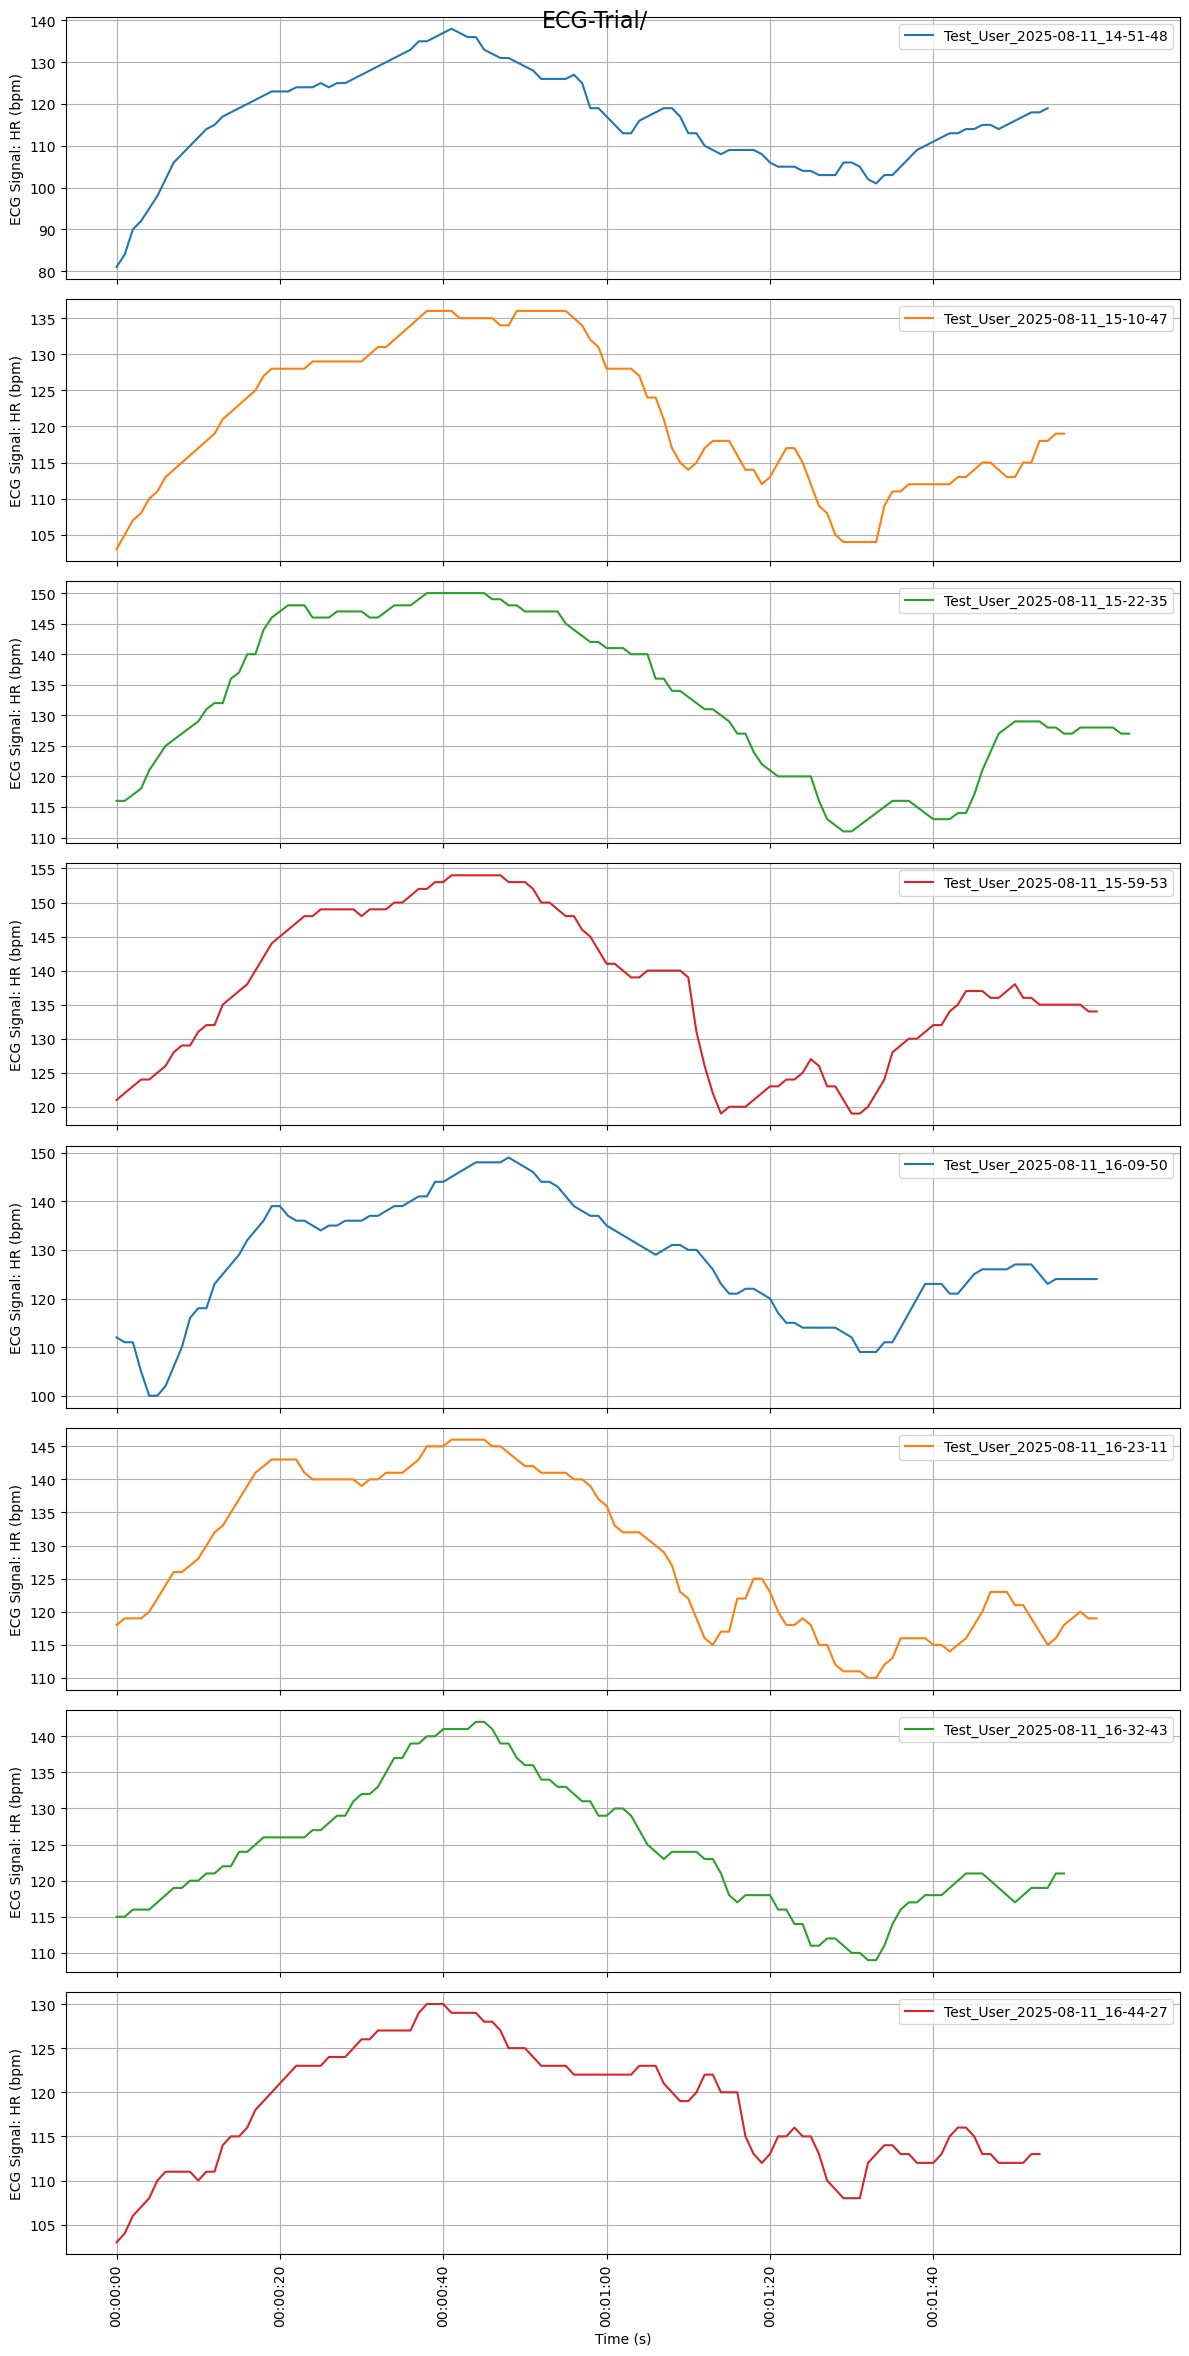

In [3]:
# Example usage:
for fpath in ['ECG-Trial/']:
    plot_ecg_from_files(fpath)

## process ECG data
data looks like:

```
| -- (current working directory)
| -- ECG-Trial/ (this is a folder I created)
|  | -- Test_User_2025-08-11_14-51-48.CSV (this is a trial file from testing)
|  | -- Test_User_2025-08-11_15-10-47.CSV
|  | -- ...
```

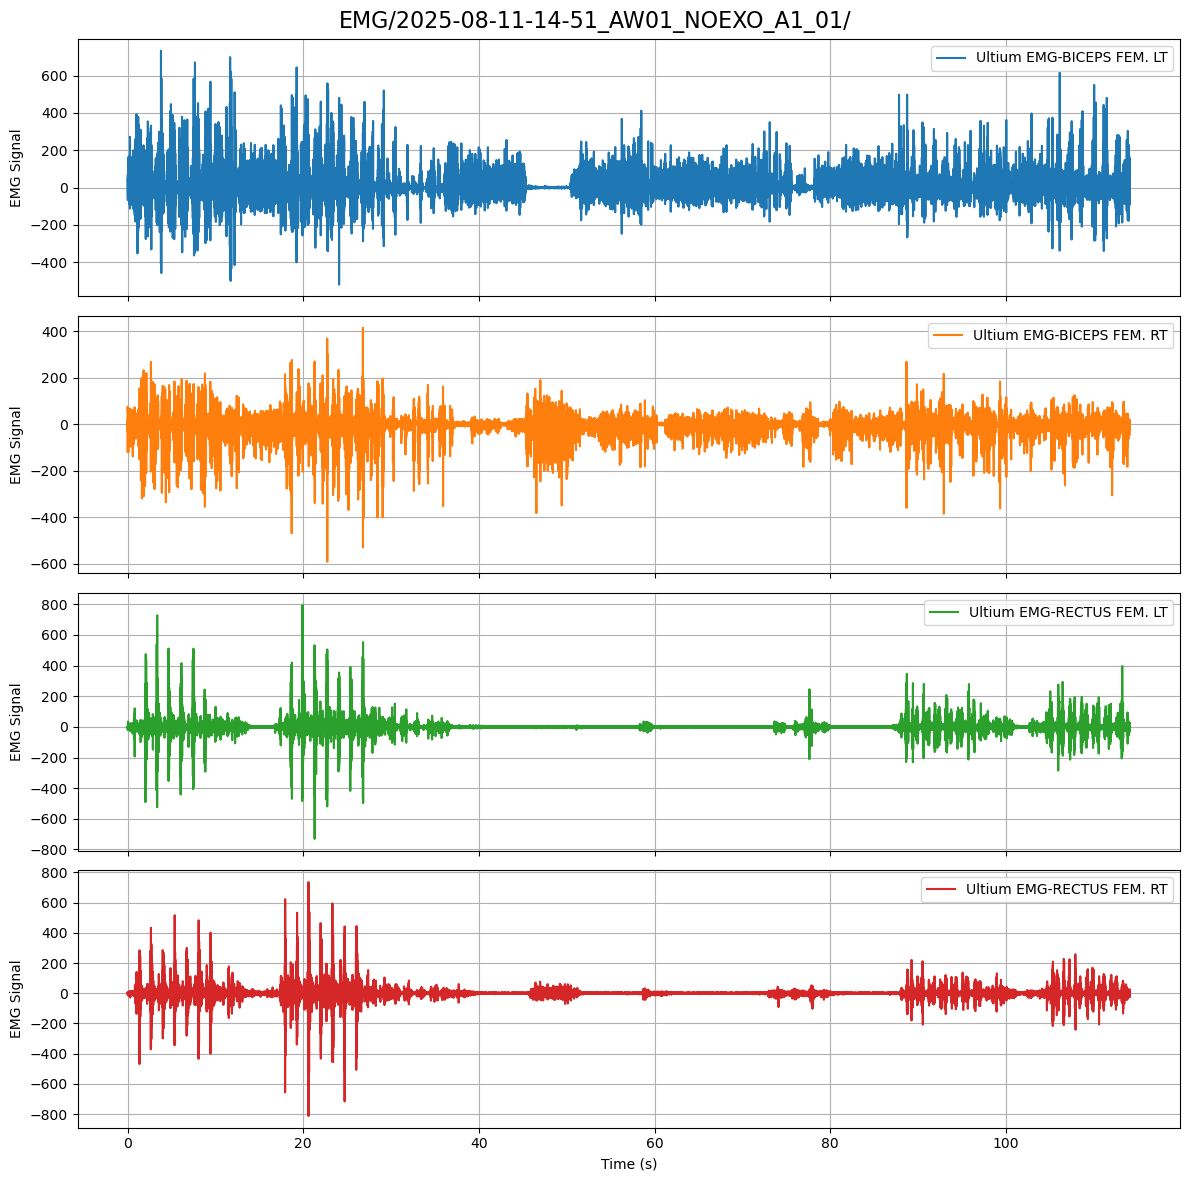

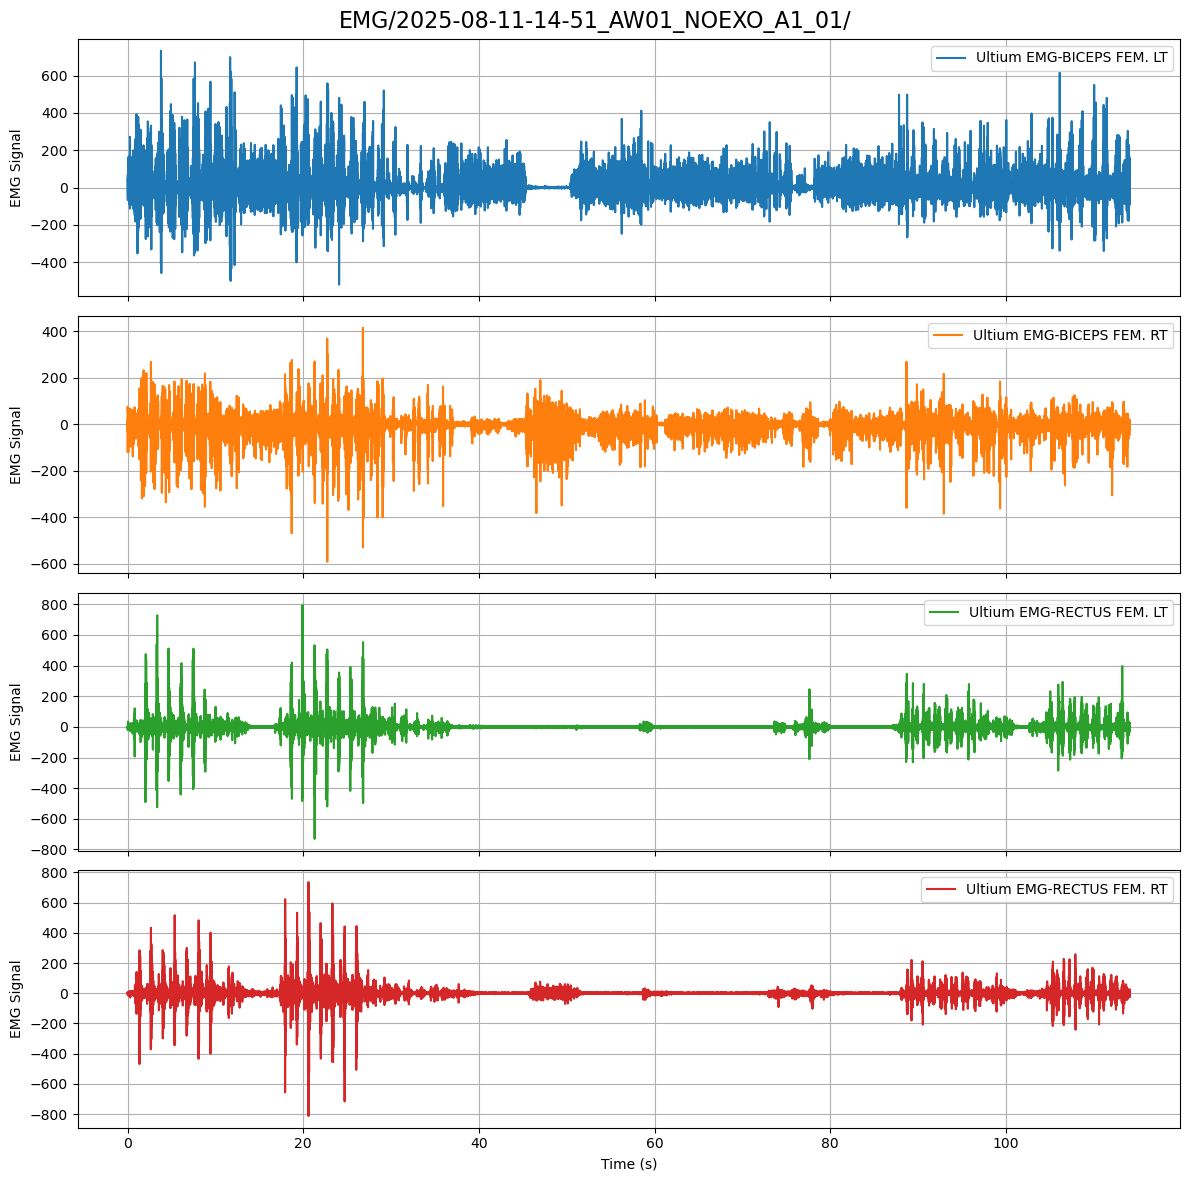

In [5]:
for fpath in ['EMG/2025-08-11-14-51_AW01_NOEXO_A1_01/','EMG/2025-08-11-14-51_AW01_NOEXO_A1_01/']:
    plot_emg_from_files(fpath)

In [6]:
laps = pd.read_csv('trial_times.csv')
laps

,Trial,Lap1,Lap2,Lap3,Lap4,Lap5,Lap6,Lap7,Total (seconds)
0,A1,10.32,3.78,13.45,60.22,10.17,3.30,12.90,114.14
1,B1,10.66,3.11,14.52,60.08,10.58,3.19,13.32,115.46
2,C1,9.38,9.08,13.09,60.23,10.96,7.68,12.80,123.22
3,D1,9.29,6.44,12.79,60.37,10.17,6.73,12.04,117.83
4,D2,9.29,8.29,13.80,60.46,10.04,5.33,12.09,119.30
5,C2,9.28,7.67,13.67,60.27,10.16,5.17,12.82,119.04
6,B2,9.34,4.76,13.81,60.49,10.70,2.70,13.56,115.36
7,A2,9.21,3.04,14.36,60.43,10.00,2.14,13.34,112.52


In [7]:
trials = ['A1 = NO EXO',
        'B1 = EXO OFF',
        'C1 = EXO ON - BUTTON',
        'D1 = EXO ON - MIC',
        'D2 = EXO ON - MIC',
        'C2 = EXO ON - BUTTON',
        'B2 = EXO OFF',
        'A2 = NO EXO']

ecg = ['Test_User_2025-08-11_14-51-48.CSV', # A1
       'Test_User_2025-08-11_15-10-47.CSV', # B1
       'Test_User_2025-08-11_15-22-35.CSV', # C1
       # '2025-08-11_15-42', # D1_1 # error
       # '2025-08-11_15-51', # D1_2 # error
       'Test_User_2025-08-11_15-59-53.CSV', # D1_3
       'Test_User_2025-08-11_16-09-50.CSV', # D2
       'Test_User_2025-08-11_16-23-11.CSV', # C2
       'Test_User_2025-08-11_16-32-43.CSV', # B2
       'Test_User_2025-08-11_16-44-27.CSV'] # A2
emg = ['2025-08-11-14-51',
       '2025-08-11-15-10',
       '2025-08-11-15-22',
       # '2025-08-11-15-42',# D1_1 # error
       # '2025-08-11-15-51',# D1_2 # error
       '2025-08-11-15-59',
       '2025-08-11-16-09',
       '2025-08-11-16-23',
       '2025-08-11-16-32',
       '2025-08-11-16-44']

laps = [list(l[1:-1]) for l in laps.values]
lap_seconds_timeline = [convert_seconds_to_hms(map_laps_to_seconds_timeline(lap_values)) for lap_values in laps]
colors = (lambda x: x + x[::-1])(['k','b','c','m'])
lines = ['-','-','-','-','--','--','--','--']

In [8]:
trial_data_20250811 = {}
for i, (v1, v2, v3, v4, v5, v6, v7) in enumerate(zip(trials,ecg,emg,laps,lap_seconds_timeline,colors,lines)):
    trial_data_20250811[f"trial_{i+1}"] = {"trial_name": v1, 
                                           "ecg_file_like": v2,
                                           "emg_folder_like": v3,
                                           "laps": v4,
                                           "laps_seconds_timeline": v5,
                                           "color": v6,
                                           "line": v7}
# trial_data_20250811

In [9]:
nasa_tlx = get_nasa_tlx_files('nasa_tlx/')

In [10]:
pd.read_csv(nasa_tlx[0],names=['measure','value'])[10:]

,measure,value
10,Mental Demand,25
11,Physical Demand,30
12,Temporal Demand,55
13,Performance,15
14,Effort,20
15,Frustration,10


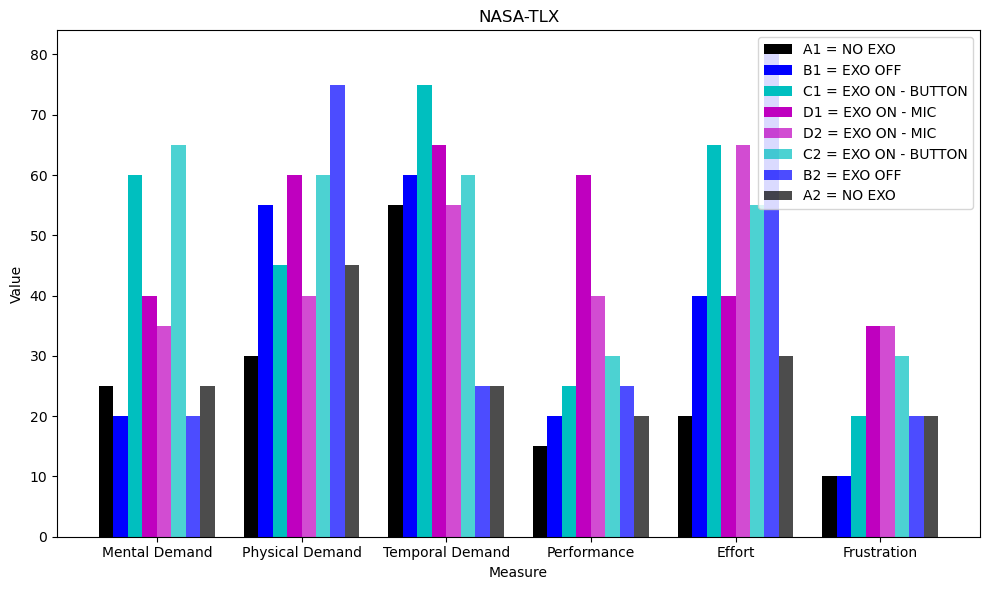

In [11]:
generate_nasa_tlx_bar_results(nasa_tlx)

In [12]:
# ---------- CONFIGURATION ----------
ECG_DIR = "ECG-Trial/"  # Folder containing ECG files
TIME_COL = "Time"  # Name of time column in your ECG CSV
SIGNAL_COL = "HR (bpm)"  # Name of ECG signal column in your ECG CSV
# ----------------------------------

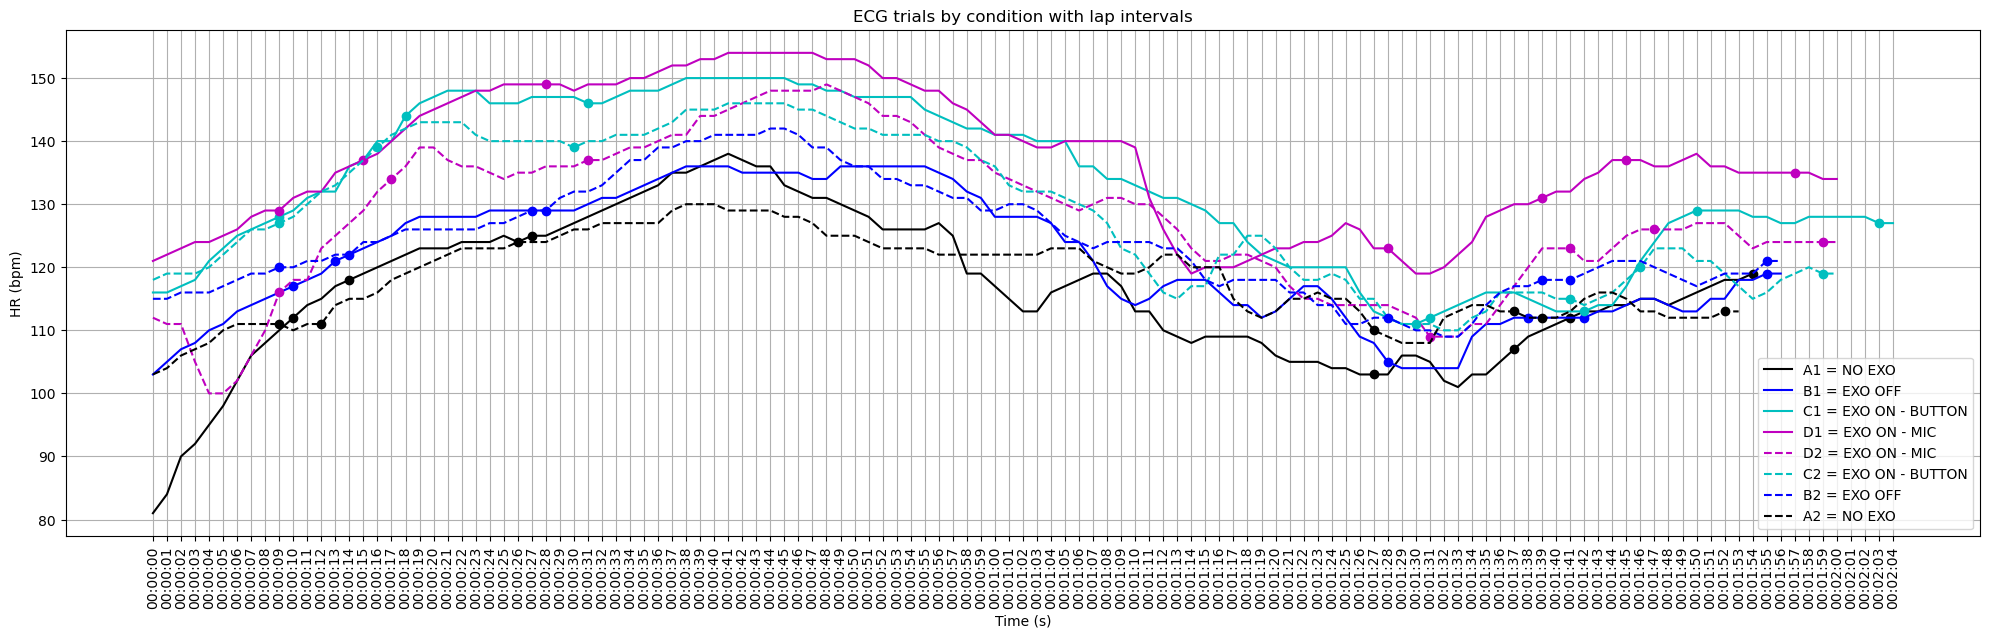

In [13]:
compare_ecg_files_single_plot(trial_data_20250811)

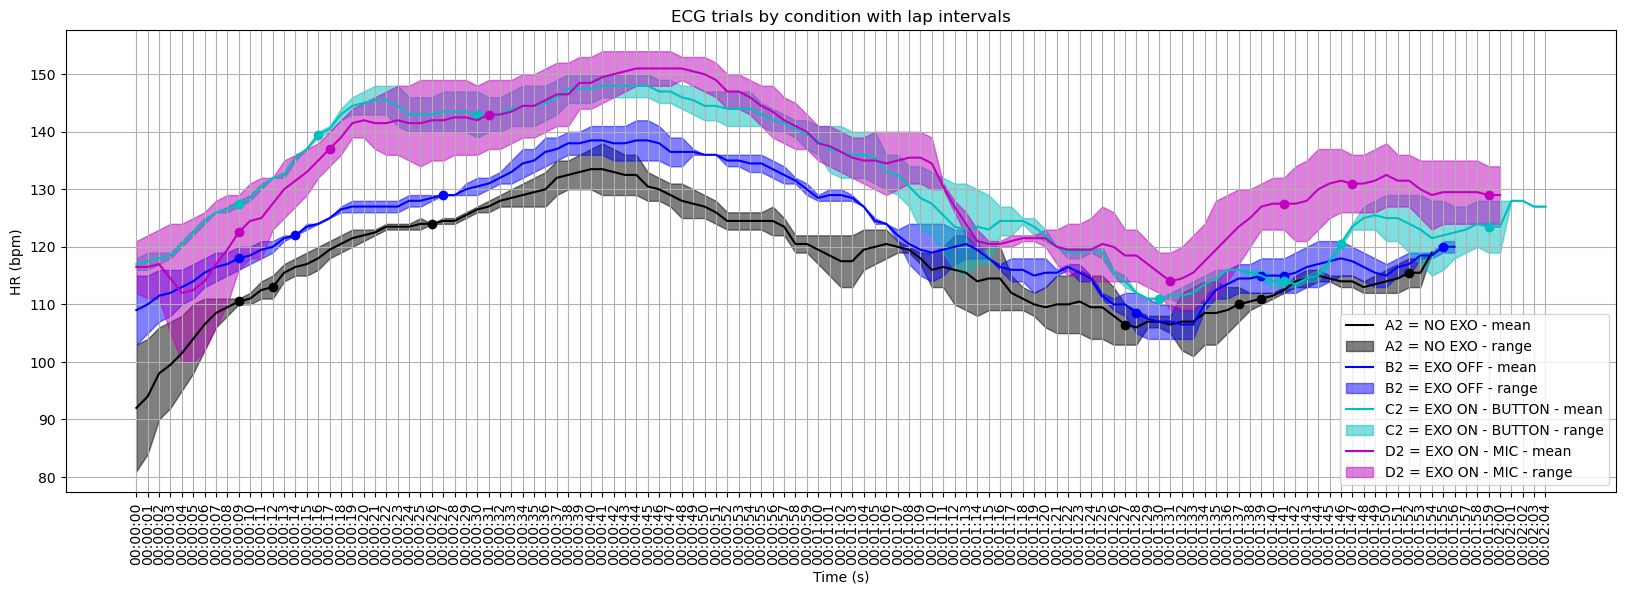

In [14]:
run_plots(trial_data_20250811)

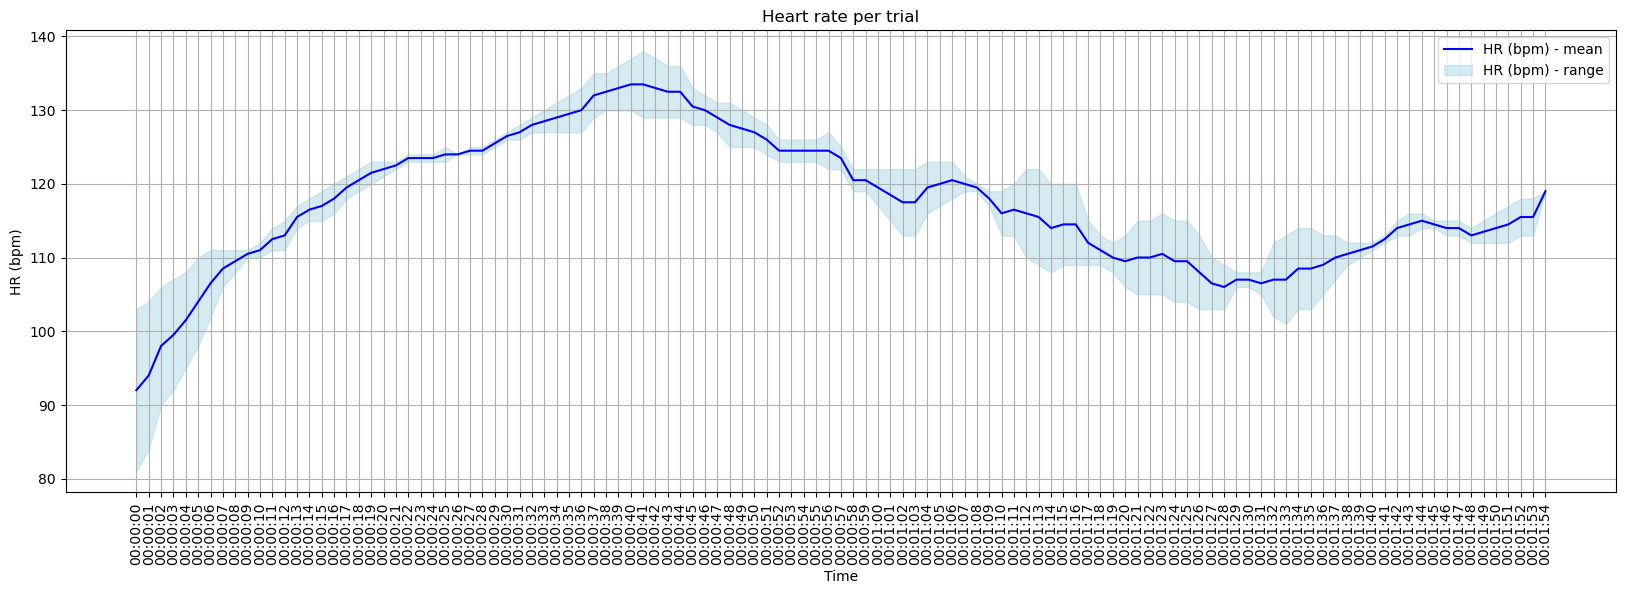

In [15]:
plt.figure(figsize=(20, 6))

agg_trial_df = agg_condition_trials(load_ecg_data("ECG-Trial/"+trial_data_20250811['trial_1']['ecg_file_like']),load_ecg_data("ECG-Trial/"+trial_data_20250811['trial_8']['ecg_file_like']))

# Plot the mean line
plt.plot(agg_trial_df['Time'], agg_trial_df['hr_mean'], label='HR (bpm) - mean', color='blue')

# Fill between min and max
plt.fill_between(agg_trial_df['Time'], agg_trial_df['hr_min'], agg_trial_df['hr_max'], color='lightblue', alpha=0.5, label='HR (bpm) - range')

plt.xlabel('Time')
plt.ylabel('HR (bpm)')
plt.title('Heart rate per trial')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [16]:
generate_lap_stats(trial_data_20250811)

...processing trial 1 of 8
	...Test_User_2025-08-11_14-51-48.CSV
...processing trial 2 of 8
	...Test_User_2025-08-11_15-10-47.CSV
...processing trial 3 of 8
	...Test_User_2025-08-11_15-22-35.CSV
...processing trial 4 of 8
	...Test_User_2025-08-11_15-59-53.CSV
...processing trial 5 of 8
	...Test_User_2025-08-11_16-09-50.CSV
...processing trial 6 of 8
	...Test_User_2025-08-11_16-23-11.CSV
...processing trial 7 of 8
	...Test_User_2025-08-11_16-32-43.CSV
...processing trial 8 of 8
	...Test_User_2025-08-11_16-44-27.CSV


,lap_id,trial_sequence,ecg_hr_min,ecg_hr_max,ecg_hr_mean,time_sec
0,trial 1_condition A1 = NO EXO_lap interval 1,5%; ascend,81.0,112.0,98.0,11
1,trial 1_condition A1 = NO EXO_lap interval 2,assist_change; pause,114.0,118.0,116.0,4
2,trial 1_condition A1 = NO EXO_lap interval 3,15%; ascend,119.0,125.0,123.0,13
3,trial 1_condition A1 = NO EXO_lap interval 4,60 sec pause,103.0,138.0,121.0,60
4,trial 1_condition A1 = NO EXO_lap interval 5,15%; descend,101.0,107.0,104.0,10
5,trial 1_condition A1 = NO EXO_lap interval 6,assist_change; pause,109.0,112.0,110.0,4
6,trial 1_condition A1 = NO EXO_lap interval 7,5%; descend,113.0,119.0,115.0,13
7,trial 2_condition B1 = EXO OFF_lap interval 1,5%; ascend,103.0,117.0,111.0,11
8,trial 2_condition B1 = EXO OFF_lap interval 2,assist_change; pause,118.0,121.0,119.0,3
9,trial 2_condition B1 = EXO OFF_lap interval 3,15%; ascend,122.0,129.0,127.0,15


In [17]:
generate_trial_stats(trial_data_20250811)

...processing trial 1 of 8
	...Test_User_2025-08-11_14-51-48.CSV
...processing trial 2 of 8
	...Test_User_2025-08-11_15-10-47.CSV
...processing trial 3 of 8
	...Test_User_2025-08-11_15-22-35.CSV
...processing trial 4 of 8
	...Test_User_2025-08-11_15-59-53.CSV
...processing trial 5 of 8
	...Test_User_2025-08-11_16-09-50.CSV
...processing trial 6 of 8
	...Test_User_2025-08-11_16-23-11.CSV
...processing trial 7 of 8
	...Test_User_2025-08-11_16-32-43.CSV
...processing trial 8 of 8
	...Test_User_2025-08-11_16-44-27.CSV


,trial_id,ecg_hr_min,ecg_hr_max,ecg_hr_mean,time_sec
0,trial 1_condition A1 = NO EXO,81.0,138.0,116.0,115
1,trial 2_condition B1 = EXO OFF,103.0,136.0,121.0,117
2,trial 3_condition C1 = EXO ON - BUTTON,111.0,150.0,133.0,125
3,trial 4_condition D1 = EXO ON - MIC,119.0,154.0,137.0,121
4,trial 5_condition D2 = EXO ON - MIC,100.0,149.0,128.0,121
5,trial 6_condition C2 = EXO ON - BUTTON,110.0,146.0,129.0,121
6,trial 7_condition B2 = EXO OFF,109.0,142.0,124.0,117
7,trial 8_condition A2 = NO EXO,103.0,130.0,118.0,114


In [18]:
generate_condition_stats(trial_data_20250811)

,condition_id,ecg_hr_min,ecg_hr_max,ecg_hr_mean,time_sec_mean
0,condition A,81.0,138.0,117.0,114.0
1,condition B,103.0,142.0,123.0,117.0
2,condition C,110.0,150.0,131.0,123.0
3,condition D,100.0,154.0,132.0,121.0
